# Data Exploration

### Analysing Trends with Single, Bivariate and Multivariate Factors

Main goals were to identify demographics within the sample that respond similarly to offers.

From this specific promotional offers could be targeted at specific groups with more effective outcomes.

### Dataset

The pre-cleaned dataset that is in this notebook is from the data cleaning notebook.

Three seperate but linked datasets have been cleaned and joined together for analysis.
1. portfolio - contains information about the offers
2. profile - contains information about the users in the trial
3. transcripts - contains information about every event in the trial

In [1]:
import pandas as pd
import numpy as np
import math
import json
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
import warnings

In [2]:
df = pd.read_csv('df_cleaned.csv')

In [3]:
df.head()

,gender,age,user_id,became_member_on,income,20s,30s,40s,50s,60s,...,bogo_2,bogo_3,bogo_4,discount_1,discount_2,discount_3,discount_4,info_1,info_2,event_id
0,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Distribution of Events')

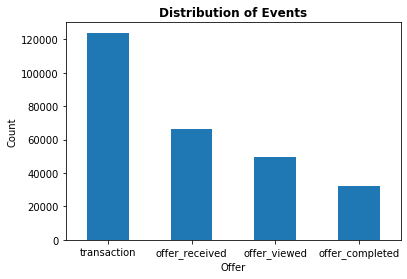

In [4]:
df.event.value_counts().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('Offer')
plt.ylabel('Count')
plt.title('Distribution of Events',fontweight='bold')

Text(0.5, 1.0, 'Distribution of Offer Types')

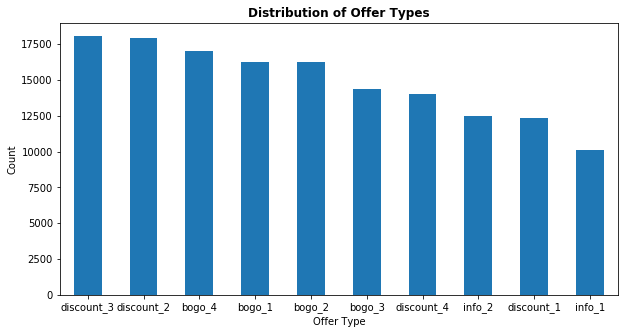

In [5]:
df.offer_name.value_counts().plot.bar(figsize=(10,5))
plt.xticks(rotation=0)
plt.xlabel('Offer Type')
plt.ylabel('Count')
plt.title('Distribution of Offer Types',fontweight='bold')

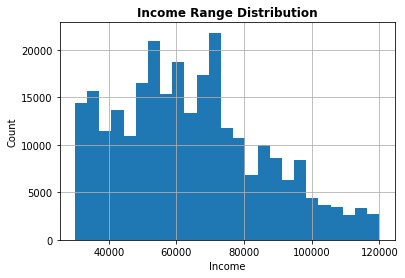

In [6]:
df.income.hist(bins = 25);
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Range Distribution', fontweight='bold');

Income distribution has an expected right skewness.

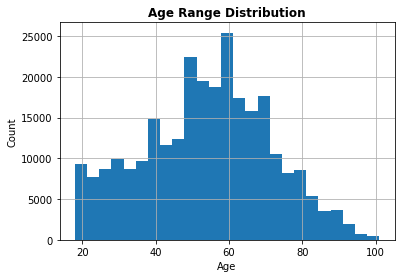

In [7]:
df.age.hist(bins = 25);
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Range Distribution', fontweight='bold');

Age distribution is a bell curve with a slight left skew due to the technical abilities needed to sign up for a rewards program, also perhaps the general nature of starbucks customers may be younger.

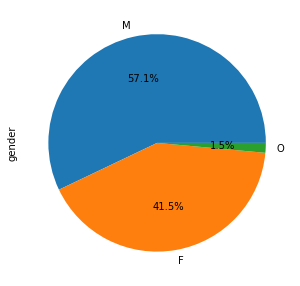

In [8]:
df.gender.value_counts().plot(kind='pie' , figsize=(5, 5), autopct='%1.1f%%')

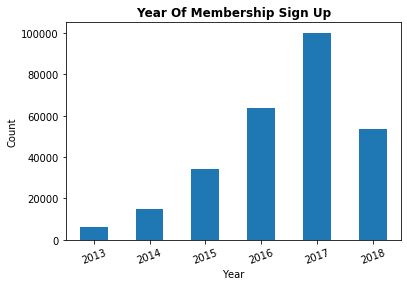

In [9]:
member = df.groupby('year_joined').count()['user_id']
member.plot(kind = 'bar')
plt.title('Year Of Membership Sign Up', fontweight='bold')
plt.xlabel('Year')
plt.xticks(rotation=20)
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Offer Completion % By Gender')

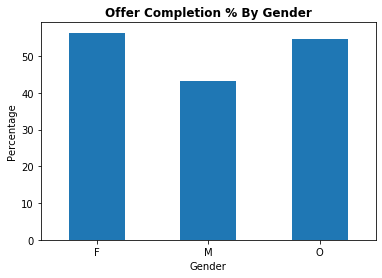

In [18]:
gender_received = df[df['offer_received']==1]
gender_received = gender_received.groupby('gender')['age'].count()

gender_completed = df[df['offer_completed']==1]
gender_completed = gender_completed.groupby('gender')['income'].count()

df_genders = pd.concat([gender_completed, gender_received], join="inner", axis =1)
df_genders['received_completion_rate'] = df_genders['income'] / df_genders['age'] * 100

df_genders.received_completion_rate.plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Offer Completion % By Gender', fontweight='bold')

Text(0.5, 1.0, 'Offer Completion % By Sign Up Year')

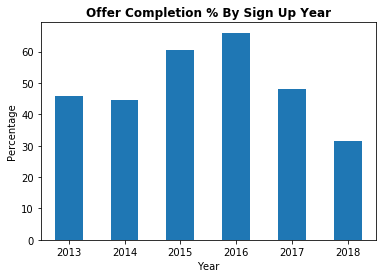

In [20]:
df_year = df[df['offer_received']==1]
df_year = df_year.groupby('year_joined')['age'].count()

df_year_2 = df[df['offer_completed']==1]
df_year_2 = df_year_2.groupby('year_joined')['income'].count()

df_years = pd.concat([df_year, df_year_2], join="inner", axis =1)
df_years['completion_rate'] = df_years['income'] / df_years['age'] * 100

df_years.completion_rate.plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Offer Completion % By Sign Up Year', fontweight='bold')

Text(0.5, 1.0, 'Offer Completion Percentage')

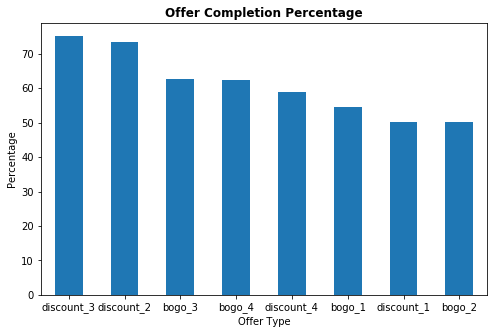

In [21]:
df_offer_type = df[df['offer_received']==1]
df_offer_type = df_offer_type.groupby('offer_name')['age'].count()

df_offer_type_2 = df[df['offer_completed']==1]
df_offer_type_2 = df_offer_type_2.groupby('offer_name')['income'].count()

df_years = pd.concat([df_offer_type_2, df_offer_type], join="inner", axis =1)
df_years['completion_rate'] = df_years['income'] / df_years['age'] * 100
df_years = df_years.completion_rate.sort_values(ascending=False)

df_years.plot(kind='bar', figsize=(8,5))
plt.xlabel('Offer Type')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.title('Offer Completion Percentage', fontweight='bold')

Text(0.5, 1.0, 'Offer Completion % After Viewing By Sign Up Year')

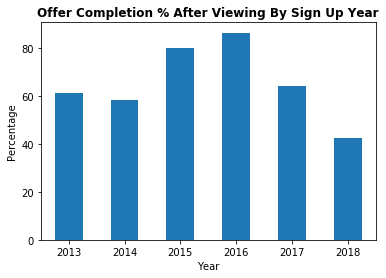

In [23]:
df_year = df[df['offer_viewed']==1]
df_year = df_year.groupby('year_joined')['age'].count()

df_year_2 = df[df['offer_completed']==1]
df_year_2 = df_year_2.groupby('year_joined')['income'].count()

df_years = pd.concat([df_year, df_year_2], join="inner", axis =1)
df_years['completion_rate'] = df_years['income'] / df_years['age'] * 100

df_years.completion_rate.plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Offer Completion % After Viewing By Sign Up Year', fontweight='bold')

In [24]:
gender_received = df[df['offer_viewed']==1]
gender_received = gender_received.groupby('gender')['age'].count()

gender_completed = df[df['offer_completed']==1]
gender_completed = gender_completed.groupby('gender')['income'].count()

df_genders_2 = pd.concat([gender_completed, gender_received], join="inner", axis =1)
df_genders_2['viewed_completion_rate'] = df_genders_2['income'] / df_genders_2['age'] * 100
df_genders_2

,income,age,viewed_completion_rate
gender,,,
F,15477,20786,74.458770
M,16466,28301,58.181690
O,501,773,64.812419


Text(0.5, 1.0, 'Offer Completion % after Viewing By Gender')

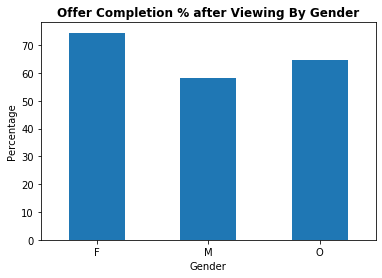

In [25]:
df_genders_2.viewed_completion_rate.plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Offer Completion % after Viewing By Gender', fontweight='bold')

In [26]:
df_genders_final = pd.concat([df_genders, df_genders_2], join="inner", axis =1)
df_genders_final = df_genders_final[['received_completion_rate','viewed_completion_rate']]

Text(0.5, 1.0, 'Completion Rate by Gender')

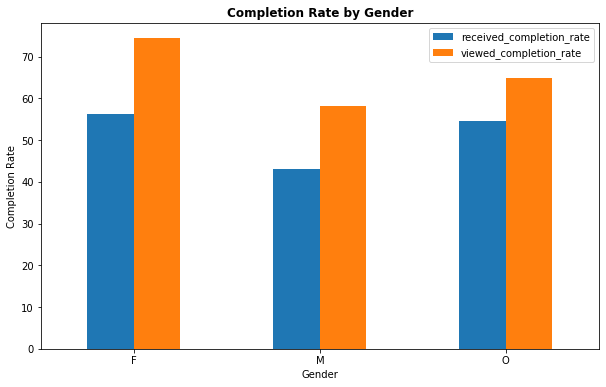

In [27]:
df_genders_final.plot(kind='bar', figsize=(10,6))
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Completion Rate')
plt.title('Completion Rate by Gender', fontweight='bold')
#plt.legend()

In [28]:
amount_income = df.groupby('income')['amount'].mean()
amount_age = df.groupby('age')['amount'].mean()

Text(0.5, 1.0, 'Average Purchase Amount By Income Level')

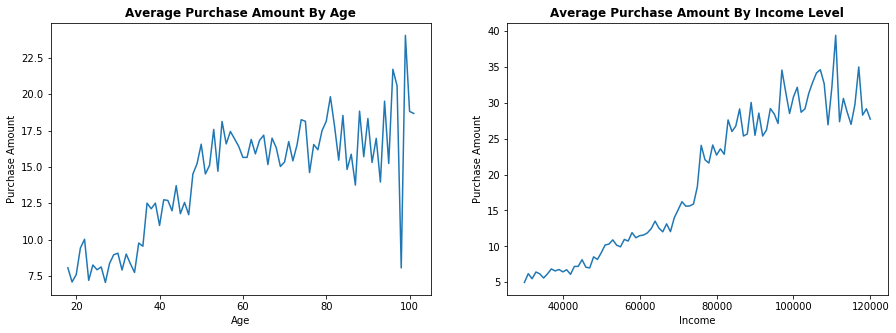

In [29]:
plt.subplot(1,2,1)
amount_age.plot(kind='line', figsize=(15,5))
plt.xticks(rotation=0)
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.title('Average Purchase Amount By Age', fontweight='bold')

plt.subplot(1,2,2)
amount_income.plot(kind='line', figsize=(15,5))
plt.xticks(rotation=0)
plt.xlabel('Income')
plt.ylabel('Purchase Amount')
plt.title('Average Purchase Amount By Income Level', fontweight='bold')

Text(0.5, 1.0, 'Offer Completion Percentage by Age')

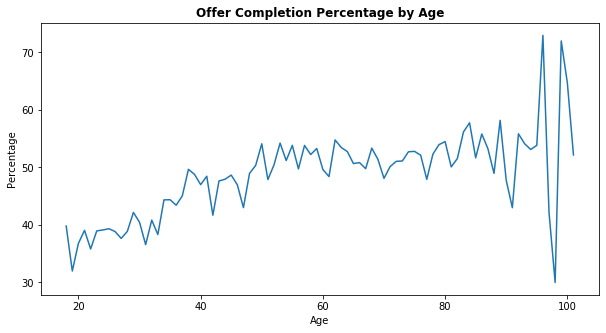

In [30]:
df_age = df[df['offer_received']==1]
df_age = df_age.groupby('age')['income'].count()

df_age_2 = df[df['offer_completed']==1]
df_age_2 = df_age_2.groupby('age')['offer_name'].count()

df_age_final = pd.concat([df_age, df_age_2], join="inner", axis =1)
df_age_final['completion_rate'] = df_age_final['offer_name'] / df_age_final['income'] * 100

df_age_final.completion_rate.plot(kind='line', figsize=(10,5))
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.title('Offer Completion Percentage by Age', fontweight='bold')

Text(0.5, 1.0, 'Offer Completion Percentage By Income')

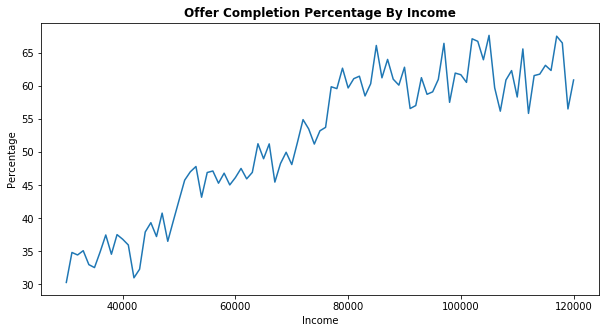

In [31]:
df_income = df[df['offer_received']==1]
df_income = df_income.groupby('income')['age'].count()

df_income_2 = df[df['offer_completed']==1]
df_income_2 = df_income_2.groupby('income')['offer_name'].count()

df_income_final = pd.concat([df_income, df_income_2], join="inner", axis =1)
df_income_final['completion_rate'] = df_income_final['offer_name'] / df_income_final['age'] * 100

df_income_final.completion_rate.plot(kind='line', figsize=(10,5))
plt.xlabel('Income')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.title('Offer Completion Percentage By Income', fontweight='bold')

In [32]:
df_income = df[df['offer_viewed']==1]
df_income = df_income.groupby('income')['age'].count()

df_income_2 = df[df['offer_completed']==1]
df_income_2 = df_income_2.groupby('income')['offer_name'].count()

df_income_final = pd.concat([df_income, df_income_2], join="inner", axis =1)
df_income_final['completion_rate'] = df_income_final['offer_name'] / df_income_final['age'] * 100

Text(0.5, 1.0, 'Completion % After Viewing By Income')

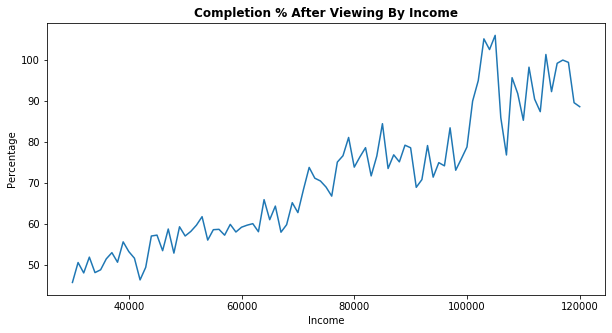

In [33]:
df_income_final.completion_rate.plot(kind='line', figsize=(10,5))
plt.xlabel('Income')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.title('Completion % After Viewing By Income', fontweight='bold')

## Linking Transactions with Related Offers

In [60]:
df_pred = df.copy()

### Sorting then Allocating Offers to Transactions

Sorted the dataframe by user_id first, then subsequently by time from the start of the trial.

In this way, I could perform time-series analysis to **combine transactions with their linked offers.**

Every single time there is an offer_completed == 1, there is a corresponding transaction right above it.

Especially since when analysing the data further, **every time this happens the transaction exceeds the min_spend neccessary to trigger the offer it is being linked to by my logic**.

In [61]:
df_pred.sort_values(by=['user_id','time_hours'])

,gender,age,user_id,became_member_on,income,20s,30s,40s,50s,60s,...,bogo_2,bogo_3,bogo_4,discount_1,discount_2,discount_3,discount_4,info_1,info_2,event_id
60071,M,33,0009655768c64bdeb2e877511632db8f,2017-04-21,72000.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
60072,M,33,0009655768c64bdeb2e877511632db8f,2017-04-21,72000.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,3
60073,M,33,0009655768c64bdeb2e877511632db8f,2017-04-21,72000.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60074,M,33,0009655768c64bdeb2e877511632db8f,2017-04-21,72000.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
60075,M,33,0009655768c64bdeb2e877511632db8f,2017-04-21,72000.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30173,F,45,ffff82501cea40309d5fdd7edcca4a07,2016-11-25,62000.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
30174,F,45,ffff82501cea40309d5fdd7edcca4a07,2016-11-25,62000.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,2
30175,F,45,ffff82501cea40309d5fdd7edcca4a07,2016-11-25,62000.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,3
30176,F,45,ffff82501cea40309d5fdd7edcca4a07,2016-11-25,62000.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df_pred = df_pred[df_pred['offer_type']!='informational']

In [65]:
df_pred[['user_id','offer_name','time_hours','offer_received','offer_viewed','offer_completed','transaction','min_spend','amount']].head(40)

,user_id,offer_name,time_hours,offer_received,offer_viewed,offer_completed,transaction,min_spend,amount
0,0610b486422d4921ae7d2bf64640c50b,NaN,18,0,0,0,1,NaN,21.51
1,0610b486422d4921ae7d2bf64640c50b,NaN,144,0,0,0,1,NaN,32.28
2,0610b486422d4921ae7d2bf64640c50b,bogo_3,408,1,0,0,0,5.0,NaN
4,0610b486422d4921ae7d2bf64640c50b,NaN,528,0,0,0,1,NaN,23.22
5,0610b486422d4921ae7d2bf64640c50b,bogo_3,528,0,0,1,0,5.0,NaN
6,78afa995795e4d85b5d9ceeca43f5fef,bogo_3,0,1,0,0,0,5.0,NaN
7,78afa995795e4d85b5d9ceeca43f5fef,bogo_3,6,0,1,0,0,5.0,NaN
8,78afa995795e4d85b5d9ceeca43f5fef,NaN,132,0,0,0,1,NaN,19.89
9,78afa995795e4d85b5d9ceeca43f5fef,bogo_3,132,0,0,1,0,5.0,NaN
10,78afa995795e4d85b5d9ceeca43f5fef,NaN,144,0,0,0,1,NaN,17.78


In [66]:
# reset index after sorting
df_pred.reset_index(inplace=True)
df_pred.drop(columns=['index'], inplace=True)
df_pred.head()

,gender,age,user_id,became_member_on,income,20s,30s,40s,50s,60s,...,bogo_2,bogo_3,bogo_4,discount_1,discount_2,discount_3,discount_4,info_1,info_2,event_id
0,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,2


In [67]:
df_pred['completed_offer'] = df_pred['offer_completed'].shift(-1)
df_pred['unviewed_transaction'] = df_pred['offer_viewed'].shift(+1)
df_pred.head()

,gender,age,user_id,became_member_on,income,20s,30s,40s,50s,60s,...,bogo_4,discount_1,discount_2,discount_3,discount_4,info_1,info_2,event_id,completed_offer,unviewed_transaction
0,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.0,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.0,0.0
2,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0.0,0.0
3,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1.0,0.0
4,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,2,0.0,0.0


In [68]:
df_pred['unviewed_completion'] = df_pred['unviewed_transaction'] + df_pred['completed_offer']
df_pred.head()

,gender,age,user_id,became_member_on,income,20s,30s,40s,50s,60s,...,discount_1,discount_2,discount_3,discount_4,info_1,info_2,event_id,completed_offer,unviewed_transaction,unviewed_completion
0,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.0,NaN,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
2,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,0,0,0,1,0,...,0,0,0,0,0,0,1,0.0,0.0,0.0
3,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1.0,0.0,1.0
4,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,0,0,0,1,0,...,0,0,0,0,0,0,2,0.0,0.0,0.0


In [69]:
unviewed_completions = df_pred[df_pred['unviewed_completion']==2]
unviewed_completions.head()

,gender,age,user_id,became_member_on,income,20s,30s,40s,50s,60s,...,discount_1,discount_2,discount_3,discount_4,info_1,info_2,event_id,completed_offer,unviewed_transaction,unviewed_completion
7,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,1.0,2.0
29,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1.0,1.0,2.0
34,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1.0,1.0,2.0
42,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1.0,1.0,2.0
49,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1.0,1.0,2.0


In [72]:
completed_offer = df_pred[(df_pred['unviewed_completion']!=2) & (df_pred['completed_offer']==1)]
completed_offer.head()

,gender,age,user_id,became_member_on,income,20s,30s,40s,50s,60s,...,discount_1,discount_2,discount_3,discount_4,info_1,info_2,event_id,completed_offer,unviewed_transaction,unviewed_completion
3,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1.0,0.0,1.0
16,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0.0,1.0
17,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,0,0,0,0,0,...,0,0,0,0,0,0,2,1.0,0.0,1.0
30,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,0,0,0,0,1,...,0,0,0,0,0,0,2,1.0,0.0,1.0
43,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,0,0,0,0,1,...,0,0,0,1,0,0,2,1.0,0.0,1.0


In [73]:
non_offer_transactions = df_pred[(df_pred['event']=='transaction') & (df_pred['completed_offer']==0)]
non_offer_transactions.head()

,gender,age,user_id,became_member_on,income,20s,30s,40s,50s,60s,...,discount_1,discount_2,discount_3,discount_4,info_1,info_2,event_id,completed_offer,unviewed_transaction,unviewed_completion
0,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.0,NaN,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
9,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
10,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
11,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0


In [74]:
total_transactions = df_pred[df_pred['event']=='transaction'].shape[0]
num_unviewed_completions = unviewed_completions.shape[0]
num_viewed_completions = completed_offer.shape[0]
num_non_trans = non_offer_transactions.shape[0]

Text(0.5, 1.0, 'Breakdown of All Transactions')

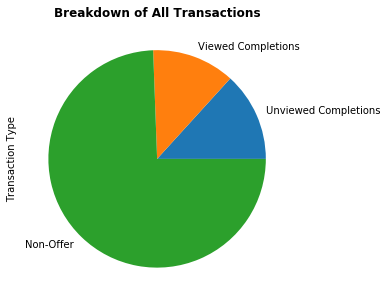

In [75]:
df_transactions = pd.DataFrame({'Transaction Type': [num_unviewed_completions, num_viewed_completions , num_non_trans]},
                  index=['Unviewed Completions', 'Viewed Completions', 'Non-Offer'])
plot = df_transactions.plot.pie(y='Transaction Type', figsize=(5, 5), legend = None)
plt.title('Breakdown of All Transactions', fontweight='bold')

In [76]:
non_offer_sum = non_offer_transactions[['age','income','female','male','other','amount']].mean()
non_viewed_offer_sum = unviewed_completions[['age','income','female','male','other','amount']].mean()
offer_sum = completed_offer[['age','income','female','male','other','amount']].mean()

df_sums = pd.concat([non_offer_sum, offer_sum, non_viewed_offer_sum], join="inner", axis =1)
df_sums.columns = ['non_offer', 'completed_offer','unviewed_completion']
df_sums

,non_offer,completed_offer,unviewed_completion
age,51.778755,54.353201,57.197477
income,59543.131126,65831.361514,72779.675135
female,0.374114,0.452197,0.500149
male,0.611889,0.535844,0.481169
other,0.013997,0.011959,0.018683
amount,11.958272,18.271855,22.190223


### Effectiveness Heuristics

From all the above analysis we can conclude that all else being equal:

- The least likely user to respond to an offer is a **young, low-income male who became a member in the last year and received bogo offer 2.**

- The most likely user to complete an offer is an **older, high-income earning woman who signed up for the rewards program in 2016 and has received discount offer 3.**

### General Trends:
- Females more likely to complete offers
- Discount offers more effective than bogo offers
- Older, high income earners more likely to complete offers, as well as complete offers without viewing them
- Members who signed up for the rewards program in 2015 & 2016 are more likely to complete offers

## Income Correlation vs Causation

An interesting point with factors that are influencing the effectiveness of an offer is that it does appear that **income is a latent factor that is creating other seemingly strong relationships by pure correlation.**

An offer's effectivness has a postitive relationship with age, membership year sign up and gender, among others. 

However when analysing further into these demographics it is clear that in all cases **higher incomes correlate with, respectively, older age, membership year sign up and gender.**

Text(0.5, 1.0, 'Offer Completion % By Sign Up Year')

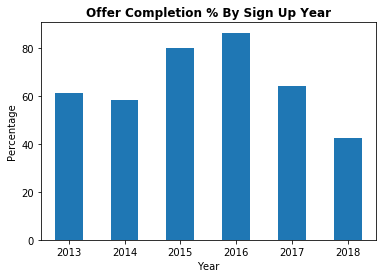

In [77]:
df_year = df[df['offer_viewed']==1]
df_year = df_year.groupby('year_joined')['age'].count()

df_year_2 = df[df['offer_completed']==1]
df_year_2 = df_year_2.groupby('year_joined')['income'].count()

df_years = pd.concat([df_year, df_year_2], join="inner", axis =1)
df_years['completion_rate'] = df_years['income'] / df_years['age'] * 100

df_years.completion_rate.plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Offer Completion % By Sign Up Year', fontweight='bold')

For instance, it does appear that membership sign up year is an actionable metric from the above graph, yet when analysing the year groups further, it is clear that income differences are what is actually driving the trends. 

Text(0.5, 1.0, 'Offer Completion % By Sign Up Year')

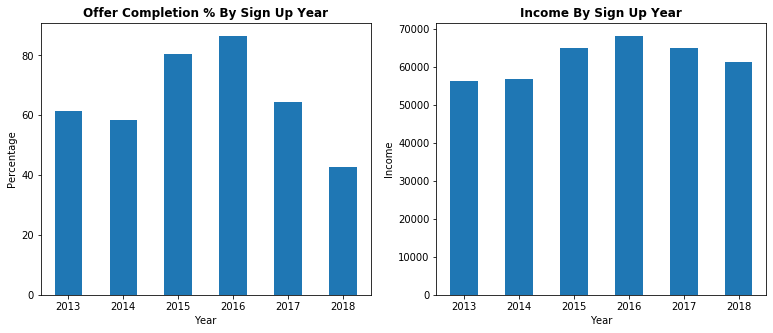

In [78]:
plt.subplot(1,2,2)
df.groupby('year_joined')['income'].mean().plot(kind='bar',figsize=(13,5))
plt.xticks(rotation=0)
plt.xlabel('Year')
plt.ylabel('Income')
plt.title('Income By Sign Up Year', fontweight='bold')

plt.subplot(1,2,1)
df_years.completion_rate.plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Offer Completion % By Sign Up Year', fontweight='bold')

Text(0.5, 1.0, 'Relationship Between Age and Income')

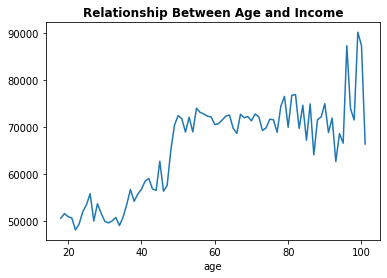

In [79]:
completed_offer.groupby('age')['income'].mean().plot(kind='line')
plt.title('Relationship Between Age and Income', fontweight='bold')

Similarly with respect to age, income and offer effectiveness.

Whereas it appears old age is making individuals seem more receptive to offers, in reality it is simply that older users earn, on average, much higher incomes than the under 40 group.

Text(0, 0.5, 'Count')

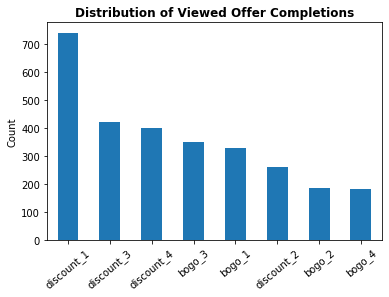

In [80]:
completed_offer.offer_name.value_counts().plot(kind='bar')
plt.title('Distribution of Viewed Offer Completions', fontweight='bold')
plt.xticks(rotation=40)
plt.ylabel('Count')

In [81]:
high_income_viewed_completions = completed_offer[completed_offer['income']>=100000]
low_income_viewed_completions = completed_offer[completed_offer['income']<=35000]

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

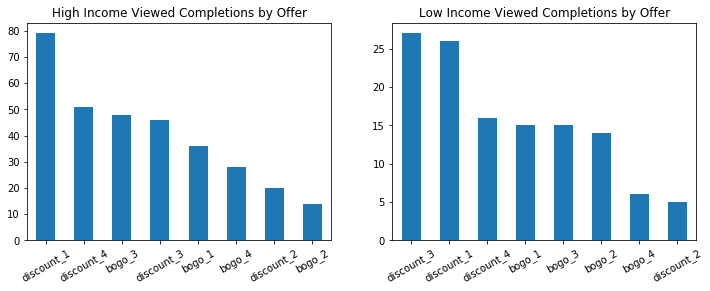

In [82]:
plt.subplot(1,2,1)
high_income_viewed_completions.offer_name.value_counts().plot.bar()
plt.title('High Income Viewed Completions by Offer')
plt.xticks(rotation=30)

plt.subplot(1,2,2)
low_income_viewed_completions.offer_name.value_counts().plot.bar(figsize=(12,4))
plt.title('Low Income Viewed Completions by Offer')
plt.xticks(rotation=30)

In [83]:
female_viewed_completions = completed_offer[completed_offer['gender']=='F']
male_viewed_completions = completed_offer[completed_offer['gender']=='M']

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

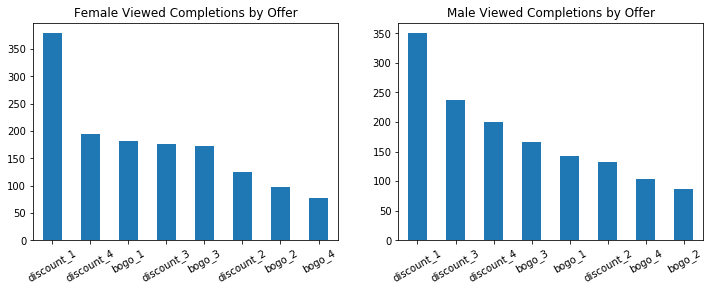

In [84]:
plt.subplot(1,2,1)
female_viewed_completions.offer_name.value_counts().plot.bar()
plt.title('Female Viewed Completions by Offer')
plt.xticks(rotation=30)

plt.subplot(1,2,2)
male_viewed_completions.offer_name.value_counts().plot.bar(figsize=(12,4))
plt.title('Male Viewed Completions by Offer')
plt.xticks(rotation=30)

In [85]:
old_viewed_completions = completed_offer[completed_offer['age']>= 60]
young_viewed_completions = completed_offer[completed_offer['age'] <= 40]

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

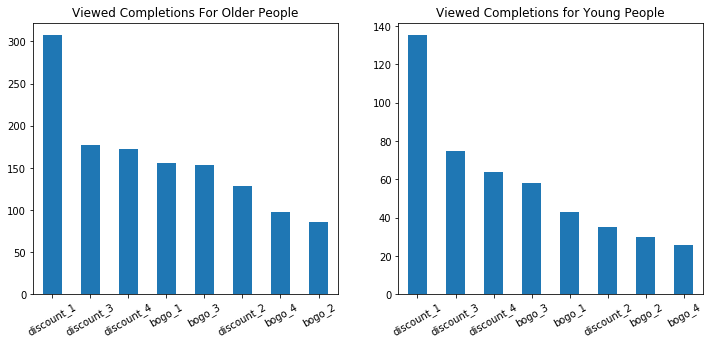

In [89]:
plt.subplot(1,2,1)
old_viewed_completions.offer_name.value_counts().plot.bar()
plt.title('Viewed Completions For Older People')
plt.xticks(rotation=30)

plt.subplot(1,2,2)
young_viewed_completions.offer_name.value_counts().plot.bar(figsize=(12,5))
plt.title('Viewed Completions for Young People')
plt.xticks(rotation=30)

## Modeling

In [116]:
df_model = df_pred.copy()

In [117]:
df_model.head()

,gender,age,user_id,became_member_on,income,20s,30s,40s,50s,60s,...,discount_1,discount_2,discount_3,discount_4,info_1,info_2,event_id,completed_offer,unviewed_transaction,unviewed_completion
0,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.0,NaN,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
2,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,0,0,0,1,0,...,0,0,0,0,0,0,1,0.0,0.0,0.0
3,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1.0,0.0,1.0
4,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,0,0,0,1,0,...,0,0,0,0,0,0,2,0.0,0.0,0.0


In [118]:
df_model.columns

Index(['gender', 'age', 'user_id', 'became_member_on', 'income', '20s', '30s',
       '40s', '50s', '60s', '70s', '80s', '90s', '> 100', 'Under 20', 'female',
       'male', 'other', 'year_joined', '2013', '2014', '2015', '2016', '2017',
       '2018', 'event', 'time_hours', 'offer_completed', 'offer_received',
       'offer_viewed', 'transaction', 'offer_id', 'amount', 'reward',
       'min_spend', 'duration_days', 'offer_type', 'email', 'mobile', 'social',
       'web', 'bogo', 'discount', 'informational', 'offer_name', 'bogo_1',
       'bogo_2', 'bogo_3', 'bogo_4', 'discount_1', 'discount_2', 'discount_3',
       'discount_4', 'info_1', 'info_2', 'event_id', 'completed_offer',
       'unviewed_transaction', 'unviewed_completion'],
      dtype='object')

In [119]:
def cleaning_model_data(df):  
    """
    
    Clean merged data frame for the model data.
    
    Parameters
    ----------
    df: input data frame
    
    Returns
    -------
    df: cleaned modelling data frame
       
    """  
    #process customer_id column
    user_ids = df_model['user_id'].unique().tolist()
    mapping = dict( zip(user_ids,range(len(user_ids))) )
    df_model.replace({'user_id': mapping},inplace=True)
    
    #process numerical variables
    #initialize a MinMaxScaler, then apply it to the features
    scaler = MinMaxScaler() # default=(0, 1)
    numerical = ['income', 'min_spend', 'duration_days', 'reward', 'time_hours']
    df_model[numerical] = scaler.fit_transform(df_model[numerical])
    
    return df

In [120]:
df_clean = cleaning_model_data(df_model)

In [142]:
df_clean.columns

Index(['gender', 'age', 'user_id', 'became_member_on', 'income', '20s', '30s',
       '40s', '50s', '60s', '70s', '80s', '90s', '> 100', 'Under 20', 'female',
       'male', 'other', 'year_joined', '2013', '2014', '2015', '2016', '2017',
       '2018', 'event', 'time_hours', 'offer_completed', 'offer_received',
       'offer_viewed', 'transaction', 'offer_id', 'amount', 'reward',
       'min_spend', 'duration_days', 'offer_type', 'email', 'mobile', 'social',
       'web', 'bogo', 'discount', 'informational', 'offer_name', 'bogo_1',
       'bogo_2', 'bogo_3', 'bogo_4', 'discount_1', 'discount_2', 'discount_3',
       'discount_4', 'info_1', 'info_2', 'event_id', 'completed_offer',
       'unviewed_transaction', 'unviewed_completion'],
      dtype='object')

In [143]:
df_clean.drop(['gender','age','offer_type','became_member_on','year_joined','event','amount','transaction',
               'offer_received','offer_id','offer_viewed','offer_completed','offer_type',
               'unviewed_transaction','unviewed_completion'], axis =1, inplace=True)

In [144]:
df_clean.drop(['offer_name'], axis=1, inplace=True)

In [145]:
df_clean.drop(['informational','bogo','discount'], axis=1, inplace=True)

In [146]:
df_clean.columns

Index(['user_id', 'income', '20s', '30s', '40s', '50s', '60s', '70s', '80s',
       '90s', '> 100', 'Under 20', 'female', 'male', 'other', '2013', '2014',
       '2015', '2016', '2017', '2018', 'time_hours', 'reward', 'min_spend',
       'duration_days', 'email', 'mobile', 'social', 'web', 'bogo_1', 'bogo_2',
       'bogo_3', 'bogo_4', 'discount_1', 'discount_2', 'discount_3',
       'discount_4', 'info_1', 'info_2', 'event_id', 'completed_offer'],
      dtype='object')

In [147]:
df_clean.head()

,user_id,income,20s,30s,40s,50s,60s,70s,80s,90s,...,bogo_3,bogo_4,discount_1,discount_2,discount_3,discount_4,info_1,info_2,event_id,completed_offer
0,0,0.911111,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0.911111,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0.911111,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0.0
3,0,0.911111,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
4,0,0.911111,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,2,0.0


In [149]:
df_clean.drop(['completed_offer'], axis=1, inplace=True)

In [150]:
df_clean.fillna(0, inplace=True)

In [151]:
data = df_clean.drop('event_id', axis=1)
labels = df_clean['event_id']

In [152]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.4, random_state = 0)

print("Training set: {} rows".format(X_train.shape[0]))
print("Testing set: {} rows".format(X_test.shape[0]))

Training set: 150061 rows
Testing set: 100041 rows


In [153]:
def train_test(clf):
    """
    Return train and test F1 score along with the model name
       
    Parameters
    --------
    clf: estimator instance
    
    Returns
    --------
    train_f1: train data F1 score
    test_f1: test data F1 score
    name: model name
       
    """
    train_prediction =  (clf.fit(X_train, y_train)).predict(X_train)
    test_predictions = (clf.fit(X_train, y_train)).predict(X_test)
    train_f1 =  accuracy_score(y_train, train_prediction)*100
    test_f1= fbeta_score(y_test, test_predictions, beta = 0.5, average='micro' )*100
    name = clf.__class__.__name__
    
    return train_f1, test_f1, name

In [154]:
clf_A = KNeighborsClassifier(n_neighbors = 5)
a_train_f1, a_test_f1, a_model = train_test(clf_A)

In [160]:
knn = {'benchmark': [ a_model], 'train F1 score':[a_train_f1], 'test F1 score': [a_test_f1]}
benchmark = pd.DataFrame(knn)
benchmark

,benchmark,train F1 score,test F1 score
0,KNeighborsClassifier,71.718168,58.473026


In [156]:
clf_B = RandomForestClassifier(random_state = 10)
b_train_f1, b_test_f1, b_model = train_test(clf_B)

In [157]:
clf_C = DecisionTreeClassifier(random_state = 10)
c_train_f1, c_test_f1, c_model = train_test(clf_C)

In [158]:
models = {'Model': ['KNeighborsClassifier (Benchmark)', b_model, c_model], 
          'train F1 score ':[a_train_f1, b_train_f1, c_train_f1], 
          'test F1 score': [a_test_f1 , b_test_f1, c_test_f1] }
          
comp = pd.DataFrame(models)

In [159]:
comp

,Model,train F1 score,test F1 score
0,KNeighborsClassifier (Benchmark),71.718168,58.473026
1,RandomForestClassifier,96.854612,67.244430
2,DecisionTreeClassifier,96.854612,79.345468


## Recommendation Engine

Also created a recommendation engine

In [124]:
def get_top_offers(n, df=df):
    '''
    INPUT:
    n - (int) the number of top offers to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_offers - (list) A list of the top 'n' offer titles 
    
    '''
    top_offers = list(completed_offer.groupby('offer_name')['user_id'].count().sort_values(ascending=False).head(n).index)
    
    return top_offers # Return the top article titles from df (not df_content)

def get_top_offer_ids(n, df=df):
    '''
    INPUT:
    n - (int) the number of top offers to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_offers- (list) A list of the top 'n' offer ids 
    
    '''
    top_offers = list(completed_offer.groupby('offer_id')['offer_completed'].count().sort_values(ascending=False).head(n).index)
 
    return top_offers # Return the top article ids

In [125]:
get_top_offers(5)

['discount_1', 'discount_3', 'discount_4', 'bogo_3', 'bogo_1']

In [126]:
get_top_offer_ids(5)

['0b1e1539f2cc45b7b9fa7c272da2e1d7',
 'fafdcd668e3743c1bb461111dcafc2a4',
 '2906b810c7d4411798c6938adc9daaa5',
 '9b98b8c7a33c4b65b9aebfe6a799e6d9',
 'ae264e3637204a6fb9bb56bc8210ddfd']

In [127]:
def create_user_item_matrix(df):
    '''
    INPUT:
    df - pandas dataframe with article_id, title, user_id columns
    
    OUTPUT:
    user_item - user item matrix 
    
    Description:
    Return a matrix with user ids as rows and article ids on the columns with 1 values where a user interacted with 
    an article and a 0 otherwise
    '''
    
    #df_completed = df[df['offer_completed']==1]
    user_item = completed_offer.groupby(by=['user_id','offer_name'])['offer_id'].agg(lambda x: 1).unstack().fillna(0)
    
    return user_item # return the user_item matrix 

user_item = create_user_item_matrix(df)

In [128]:
user_item

offer_name,bogo_1,bogo_2,bogo_3,bogo_4,discount_1,discount_2,discount_3,discount_4
user_id,,,,,,,,
0011e0d4e6b944f998e987f904e8c1e5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0020c2b971eb4e9188eac86d93036a77,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
00ae03011f9f49b8a4b3e6d416678b0b,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00c2f812f4604c8893152a5c6572030e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
00cf1bbec83f4a658f8994e556db4633,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
ffb7fc8ad0594248a49e210ff0217c2d,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
ffda4545e7084ff6aaf01304fb1c1fa6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ffe5257abf8840b395e1ee6b29894637,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [129]:
def find_similar_users(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user_id
    user_item - (pandas dataframe) matrix of users by offers: 
                1's when a user has completed an offer, 0 otherwise
    
    OUTPUT:
    similar_users - (list) an ordered list where the closest users (largest dot product users)
                    are listed first
    
    Description:
    Computes the similarity of every pair of users based on the dot product
    Returns an ordered
    '''
    
    # compute similarity of each user to the provided user
    similarity = {}
    for user in user_item.index:
        similarity[user] = np.dot(user_item.loc[user_id, :], user_item.loc[user, :])
    
    # sort by similarity
    sorted_sim = sorted(similarity.items(), key = lambda kv: kv[1], reverse = True)

    # create list of just the ids
    most_similar_users = [key for (key, value) in sorted_sim]
   
    # remove the own user's id
    most_similar_users.remove(user_id)
       
    return most_similar_users # return a list of the users in order from most to least similar

In [130]:
find_similar_users('00ae03011f9f49b8a4b3e6d416678b0b')

['034b962ed61d4da1bb0baaec84cc2e85',
 '03c23b2ec84f4c5296e99c939288bcd4',
 '06f4bfb1cb4c4c968add3d9980a279fa',
 '07e29d02d0074da28b430e1dc40cc1fc',
 '08926f1f08c34a4a9681ab3d6a5ef17e',
 '09218129551d4929a3beea8d3eafd787',
 '0a0bb27cb9904b638d376ad1c6d09e81',
 '0a445954a2f749df8f0811d466dd31e0',
 '0a7c7af5e814481b8e4a4a3b6e2f8697',
 '0ae0111e8e394788879bd78cd520d8a0',
 '0b54aa822f7b44e6b023cea1a0e8d8a0',
 '0b854279718f4295a7a6bae7cd7ee2e3',
 '0cdbae04f7394db9b09a905291336ea6',
 '0d430e04265c4049809fe2ce680940ee',
 '0d50a9abf52442e29e484474cc8d0d68',
 '0e7f9c775784453d8504e4a480d56c8e',
 '0fc637442b954432b13c360af61d4256',
 '11bfc66cfc5b421ab0e1a8cb8ef7fd5c',
 '121640db35dc4acb805382c52875321d',
 '123b82af56404ec3bece3de96b947fc2',
 '126c69fbba93498dbb0e353b27121ec9',
 '153f7ce19d8f4c8294fdc8d758c880c7',
 '1557b5b0908a4ef185af8295f50f16c4',
 '157034648e3b422f8f7af11778bacb69',
 '166a75c9081b47c29dd292f227da93c4',
 '1853362ad12c41bc8d7fefc8bafbe90a',
 '187b3bf0d99f40c585166d98cadc941c',
 

In [131]:
def get_offer_names(offer_ids, df=df):
    '''
    INPUT:
    offer_ids - (list) a list of offer ids
    df - (pandas dataframe) df as defined at the top of the notebook
    
    OUTPUT:
    offer_names - (list) a list of offer names associated with the list of offer ids 
                    (this is identified by the offer_name column)
    '''
    offer_names = list(df.loc[df['offer_id'].isin(offer_ids), 'offer_name'].unique())

    return offer_names # Return the article names associated with list of article ids

def get_user_offers(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user id
    user_item - (pandas dataframe) matrix of users by offer: 
                1's when a user has completed an offer, 0 otherwise
    
    OUTPUT:
    offer_ids - (list) a list of the offer ids seen by the user
    offer_names - (list) a list of offer names associated with the list of offer ids 
    
    Description:
    Provides a list of the offer_ids and offer names that have been completed by a user
    '''
    offer_ids = user_item.columns.values[list(user_item.loc[user_id,] == 1)]
    offer_ids = offer_ids.astype(str)
    offer_names = get_offer_names(offer_ids)
    
    return offer_ids, offer_names # return the ids and names

In [132]:
get_user_offers('00ae03011f9f49b8a4b3e6d416678b0b')

(array(['bogo_1'], dtype='<U6'), [])

In [133]:
def user_user_recs(user_id, m=3, user_item=user_item):
    #recommendations = movie_names(recs)
    
    #return recommendations

    most_similar_users = find_similar_users(user_id, user_item = user_item)
    user_offer_ids, user_offer_names = get_user_offers(user_id)
    
    recs = np.array([])
    
    for similar_user_id in most_similar_users:
        if len(recs)<m:
            similar_offer_ids, similar_offer_names = get_user_offers(similar_user_id)
            
            new_recs = np.setdiff1d(similar_offer_ids, user_offer_ids, assume_unique=True)
            
            recs = np.unique(np.concatenate([new_recs, recs], axis=0))
            recs = list(recs)
        
            #recs = [item for sublist in recs for item in sublist]
        else:
            break
        
    recs = recs[:m]
    
    return recs # return your recommendations for this user_id

In [134]:
user_user_recs('00ae03011f9f49b8a4b3e6d416678b0b')

['bogo_4', 'discount_1', 'discount_3']

In [135]:
df_pred[df_pred['user_id']=='00ae03011f9f49b8a4b3e6d416678b0b'].head(1)

,gender,age,user_id,became_member_on,income,20s,30s,40s,50s,60s,...,discount_1,discount_2,discount_3,discount_4,info_1,info_2,event_id,completed_offer,unviewed_transaction,unviewed_completion
249035,M,55,00ae03011f9f49b8a4b3e6d416678b0b,2015-11-15,83000.0,0,0,0,1,0,...,0,0,0,1,0,0,1,0.0,0.0,0.0


In [140]:
user_user_recs('ffda4545e7084ff6aaf01304fb1c1fa6')

['bogo_3', 'bogo_4', 'discount_4']

In [141]:
df_pred[df_pred['user_id']=='ffda4545e7084ff6aaf01304fb1c1fa6'].head(1)

,gender,age,user_id,became_member_on,income,20s,30s,40s,50s,60s,...,discount_1,discount_2,discount_3,discount_4,info_1,info_2,event_id,completed_offer,unviewed_transaction,unviewed_completion
162536,F,67,ffda4545e7084ff6aaf01304fb1c1fa6,2018-07-21,95000.0,0,0,0,0,1,...,0,0,0,0,0,0,1,0.0,0.0,0.0
